### Лабораторная работа №6 ###
### Картанбаев Чингиз Win-1-21 ###

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Задание №2 ###

### Название вашего датасета ###

In [2]:
digits = load_digits()

<h4>Размерность датасета</h4>

In [3]:
print(digits['data'].shape)

(1797, 64)


<h4>Список признаков</h4>

In [4]:
print(digits['feature_names'])

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


<h4>Краткое описание</h4>

In [42]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

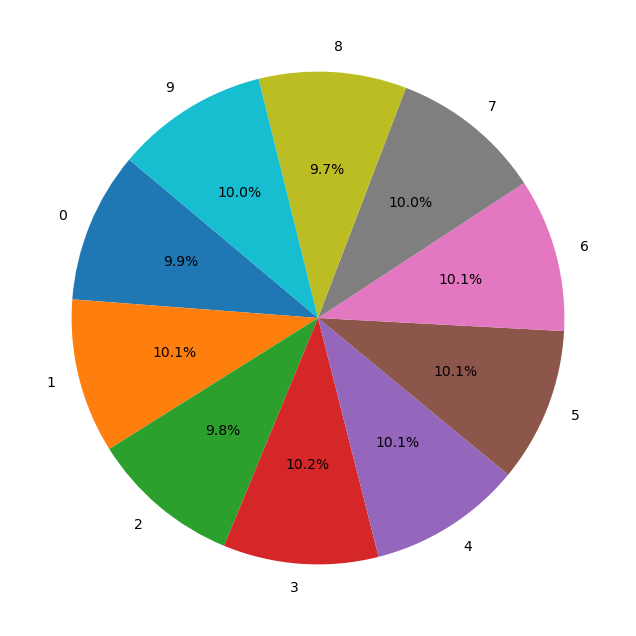

In [5]:
class_labels, class_counts = zip(*sorted(
    zip(digits['target_names'], [sum(digits['target'] == i) for i in range(len(digits['target_names']))])))

plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.show()

<h4>Решетчатый поиск</h4>

In [6]:
# Разделение на тренировочный и тестовый наборый
X_training, X_testing, y_training, y_testing = train_test_split(digits.data, digits.target, random_state=13)

# Параметры для алгоритма решетчатого поиска
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 1.0, 2.0],
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)

prediction = grid_search.predict(X_testing)

print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.9933184855233853
Лучшие параметры: {'C': 10.0, 'coef0': 0.0, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'}


<h4>Матрица ошибок</h4>

In [7]:
cm = confusion_matrix(y_testing, prediction)
print(cm)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  2]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0  0  1 42]]


<h4>Отчет результативности модели по датасету</h4>

In [8]:
print(classification_report(y_testing, prediction, target_names = [str(item) for item in digits.target_names]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.96      1.00      0.98        44
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        51
           4       1.00      1.00      1.00        47
           5       1.00      0.96      0.98        56
           6       1.00      1.00      1.00        49
           7       1.00      0.97      0.99        36
           8       0.98      0.96      0.97        45
           9       0.93      0.98      0.95        43

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



<h4> Данная модель показывает хорошй результат. Так же модель сделала допустимое количество ошибок. Улучшить результат не возможно. </h4>

### Задание №3 ###

In [35]:
data = {'salary': [], 'city': [], 'age': [], 'vacation_prefer': [], 'transport_prefer': [], 'target': []}

for _ in range(1000):
    data['salary'].append(random.randint(1000, 10000)) 
    data['city'].append(random.choice(['New York', 'Paris', 'Tokyo', 'London', 'Los Angeles', 'Sydney', 'Berlin', 'Moscow', 'Toronto']))
    data['age'].append(random.randint(10, 80))
    data['vacation_prefer'].append(random.choice(['Camping', 'Hiking', 'Sightseeing'])) 
    data['transport_prefer'].append(random.choice(['Auto', 'Public Transport', 'Bicycle', 'Walking', 'Taxi', 'Ride-sharing']))
    data['target'].append(random.choice(['Auckland', 'Helsinki', 'Buenos Aires']))
    
df = pd.DataFrame(data)

In [36]:
df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'])

In [37]:
X_training, X_testing, y_training, y_testing = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

In [38]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['rbf'],
}

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid_search.fit(X_training, y_training)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)

### Оценка модели ###

In [39]:
print('Лучший результат: {}'.format(grid_search.best_score_))
print('Лучшие параметры: {}'.format(grid_search.best_params_))

Лучший результат: 0.36124956586222107
Лучшие параметры: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}


### Отчет ###

In [40]:
prediction = grid_search.predict(X_testing)

print(classification_report(y_testing, prediction, target_names=['Auckland', 'Helsinki', 'Buenos Aires'], zero_division=1))

              precision    recall  f1-score   support

    Auckland       1.00      0.00      0.00        61
    Helsinki       1.00      0.00      0.00        73
Buenos Aires       0.33      1.00      0.50        66

    accuracy                           0.33       200
   macro avg       0.78      0.33      0.17       200
weighted avg       0.78      0.33      0.16       200



<h4> 
Эта особенность случайно сгенерированных данных приводит к тому, что любые попытки улучшения результата становятся фактически бесполезными. Отсутствие логической связи и структуры в случайных данных делает любые действия по оптимизации или коррекции направленными в пустоту. Для достижения конкретных целей или выявления паттернов необходимо обладать системностью и структурированностью данных. 
</h4>